# Checking the difference in the prediction, number of times one experiment over and under predicts

## imports

In [28]:
# Third-party imports
%matplotlib inline
import json
import matplotlib.pyplot as plt
import mxnet as mx
from mxnet import gluon

In [29]:
from src.RQ1_forecast import *

In [30]:
num_samples = 100

In [31]:
data_address1 = '/home/dev/deepts/experiments/deep_ar/electricity/8B'

# metric section

In [32]:
# loop through all the runs in the results folder and read the metric dataframe
metrics_list1 = read_csv_result('metrics.csv', data_address1)

78it [00:00, 30649.78it/s]
100%|############| 77/77 [00:00<00:00, 127.28it/s]


In [33]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,35.265661,93.833755,235.0,9.791667,8.031874,0.486778,0.744756,0.450049,NaN,3.483151,38.160243,0.000000,93.833749,0.791667,96.125674,1.000000
1,1,1.0,22.690272,102.847336,2499.0,104.125000,9.577165,0.447450,0.040888,0.040790,NaN,3.574717,81.386099,0.000000,102.847336,0.375000,82.945032,1.000000
2,2,2.0,0.246865,9.078655,190.0,7.916667,8.673073,0.043615,0.048439,0.046922,NaN,0.663838,11.638396,0.000000,9.078655,0.833333,15.997668,1.000000
3,3,3.0,1456.936035,669.135742,10468.0,436.166667,48.398763,0.576061,0.063990,0.067558,NaN,6.201107,327.762604,0.000000,669.135773,0.166667,335.792798,0.791667
4,4,4.0,115.585124,184.094849,4087.0,170.291667,25.383302,0.302192,0.043696,0.044734,NaN,2.700191,120.898088,0.000000,184.094849,0.416667,122.326608,0.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,2242,316.0,755.888346,561.504639,6671.0,277.958333,30.914619,0.756795,0.136900,0.130599,NaN,7.544183,254.459560,0.166667,561.504601,0.500000,297.112126,0.916667
2243,2243,317.0,183.822673,224.706009,1058.0,44.083333,31.192686,0.300159,0.213543,0.202188,NaN,1.649050,110.998192,0.125000,224.706001,0.583333,65.325362,1.000000
2244,2244,318.0,131399.781250,7808.467773,50192.0,2091.333333,267.793565,1.214939,0.152828,0.157984,NaN,26.992710,3362.155176,0.208333,7808.467407,0.250000,6520.808594,0.458333
2245,2245,319.0,10027.408854,1975.638672,10581.0,440.875000,169.860660,0.484622,0.180714,0.204526,NaN,2.177942,1082.018167,0.000000,1975.638687,0.083333,428.954990,0.875000


In [34]:
def sort_metric_df(my_metrics_df):
    my_metrics_df.sort_values(by=['item_id', 'Unnamed: 0'], inplace=True)
    my_metrics_df.reset_index(drop=True, inplace=True)
    return my_metrics_df

In [35]:
def sort_metric_list(my_metric_list):
    for my_metric_df in my_metric_list:
        my_metric_df = sort_metric_df(my_metric_df)

In [36]:
sort_metric_list(metrics_list1)


In [37]:
metrics_list1[0]

,Unnamed: 0,item_id,MSE,abs_error,abs_target_sum,abs_target_mean,seasonal_error,MASE,MAPE,sMAPE,OWA,MSIS,QuantileLoss[0.1],Coverage[0.1],QuantileLoss[0.5],Coverage[0.5],QuantileLoss[0.9],Coverage[0.9]
0,0,0.0,35.265661,93.833755,235.0,9.791667,8.031874,0.486778,0.744756,0.450049,NaN,3.483151,38.160243,0.000000,93.833749,0.791667,96.125674,1.000000
1,321,0.0,90.944784,153.695129,264.0,11.000000,8.026991,0.797804,0.947302,0.727089,NaN,8.543276,52.635666,0.000000,153.695137,0.333333,90.649221,0.791667
2,642,0.0,100.182861,136.964111,284.0,11.833333,8.025109,0.711123,0.726547,0.445574,NaN,6.229799,45.042117,0.041667,136.964114,0.458333,100.154023,0.958333
3,963,0.0,62.446833,170.258881,189.0,7.875000,8.024132,0.884098,1.218069,1.349017,NaN,4.112995,59.908860,0.000000,170.258865,0.083333,44.722630,0.833333
4,1284,0.0,16.447637,65.521133,166.0,6.916667,8.019890,0.340410,0.709317,0.434821,NaN,3.715238,33.079609,0.041667,65.521137,0.416667,35.457825,0.958333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,962,320.0,9115.265625,1562.846191,74254.0,3093.916667,287.494114,0.226504,0.020685,0.021068,NaN,1.778029,1362.000488,0.000000,1562.846191,0.125000,821.263379,0.958333
2243,1283,320.0,69474.807292,5678.336914,78719.0,3279.958333,287.257349,0.823643,0.070525,0.073482,NaN,8.794011,2206.489697,0.000000,5678.336670,0.000000,2414.210156,0.541667
2244,1604,320.0,25690.575521,2912.080811,74298.0,3095.750000,287.146950,0.422560,0.036328,0.037139,NaN,2.679147,1433.106641,0.000000,2912.080811,0.333333,1076.310010,0.875000
2245,1925,320.0,7566.198568,1667.907959,68217.0,2842.375000,287.030085,0.242122,0.024046,0.024219,NaN,1.450540,1072.335352,0.000000,1667.907959,0.333333,926.138232,1.000000


# Forecast section

In [38]:
# read the forecast file
forcast_list1 = read_csv_result('forecasts.csv', data_address1, n_files=100)
# forcast_list2 = read_csv_result('forecasts.csv', data_address2, n_files=100)

78it [00:00, 25423.98it/s]
100%|#############| 77/77 [00:53<00:00,  1.45it/s]


In [39]:
len(forcast_list1)

77

In [40]:
# sort the forcast lists based on their original time series
sorted_forcast_list1 = get_sorted_csv(forcast_list1, num_time_series=321)
# sorted_forcast_list2 = get_sorted_csv(forcast_list2)

In [41]:
sorted_forcast_list1[0].head(26)

,fold_num,series_number,timestamp,target,sample0,sample1,sample2,sample3,sample4,sample5,...,sample94,sample95,sample96,sample97,sample98,sample99,train_series_number,mean,std,normal_std
0,1,0,2014-05-26 20:00:00,9.0,10.982723,15.265918,14.675426,12.490794,12.098587,8.901157,...,15.424452,9.569318,17.444174,14.965517,7.410717,14.175667,0,11.394478,6.445943,0.115787
1,1,0,2014-05-26 21:00:00,10.0,2.676531,23.072605,15.415314,11.486424,18.045250,13.842045,...,5.543096,11.532989,22.047337,11.668881,12.567714,21.325066,0,16.809215,10.534836,0.111096
2,1,0,2014-05-26 22:00:00,22.0,5.222621,13.265156,11.310377,11.811809,33.942005,18.448671,...,5.677798,1.980687,9.512141,9.025451,5.385921,16.688880,0,15.866034,10.573375,0.158574
3,1,0,2014-05-26 23:00:00,20.0,15.866774,14.000575,14.366771,17.340038,37.081947,24.986280,...,12.088286,10.510940,19.586610,15.521471,15.405548,18.810766,0,19.546052,9.169864,0.213259
4,1,0,2014-05-27 00:00:00,13.0,4.682535,16.877890,13.796034,15.820582,26.502121,15.269002,...,11.492827,13.290105,11.598953,12.467443,10.713552,37.450085,0,19.109045,7.955769,0.199018
5,1,0,2014-05-27 01:00:00,12.0,8.773034,10.731559,20.909344,17.524698,24.394972,19.240253,...,12.913892,12.577448,11.879167,13.586222,11.401377,25.457560,0,17.727931,8.165665,0.128071
6,1,0,2014-05-27 02:00:00,13.0,11.358902,-2.257976,20.054272,14.785743,16.940203,15.878496,...,14.691231,13.766602,13.845866,25.881618,15.823568,29.422258,0,16.110178,8.906638,0.203188
7,1,0,2014-05-27 03:00:00,13.0,12.045868,12.092299,19.136524,16.717823,39.469160,5.762473,...,12.112357,12.968510,21.271236,16.512175,9.557021,18.476070,0,16.185828,8.875310,0.182947
8,1,0,2014-05-27 04:00:00,12.0,13.781980,12.565327,10.705663,16.958288,23.847116,14.749467,...,11.745752,18.458982,-1.838140,8.391601,11.146062,19.109253,0,16.672787,10.502500,0.141008
9,1,0,2014-05-27 05:00:00,13.0,19.710524,21.557010,-18.371262,9.260807,25.476610,14.390778,...,1.735669,16.100975,7.615371,9.684259,16.965755,8.861210,0,14.753486,10.830829,0.151148


In [42]:
target_forcast_series = get_forcast_target(forcast_list1)

In [43]:
# this dataframe is just one time series
ts_number = 0
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)

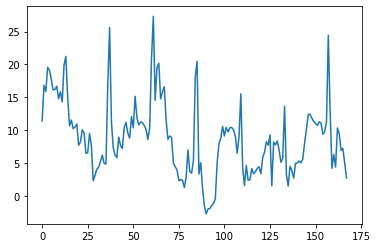

In [44]:
# plot mean of only one time series
rep_no = 0
# plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot()
# ts_list2[rep_no]['mean'].plot()

## We want to compare the number of time points on experiment underpredict. 
Question is are experiments with worst MAPE, underpredict most of the time?

In [67]:
# question: is the worse one always underpredict?
# we need to use compare means, but I need to change the function
# experiment A
expA_worst_compare = (sorted_forcast_list1[35]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_best_compare = (sorted_forcast_list1[20]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_highest_compare = (sorted_forcast_list1[7]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
expA_lowest_compare = (sorted_forcast_list1[35]['mean'] < sorted_forcast_list1[0]['target']).value_counts()

# # experiment B
# expB_worst_compare = (sorted_forcast_list2[63]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_best_compare = (sorted_forcast_list2[68]['mean'] < sorted_forcast_list1[0]['target']).value_counts()
# expB_highest_compare = (sorted_forcast_list2[8]['mean'] < sorted_forcast_list2[0]['target']).value_counts()

In [68]:
# outputs the proportion of true experiences over all the experiences
def compare_two_series(seriesTrue, seriesFalse):
    return seriesTrue/(seriesTrue + seriesFalse)

underpred_A_best = compare_two_series(expA_best_compare[True], expA_best_compare[False])
underpred_A_worst = compare_two_series(expA_worst_compare[True], expA_worst_compare[False])
underpred_A_highest = compare_two_series(expA_highest_compare[True], expA_highest_compare[False])
underpred_A_lowest = compare_two_series(expA_lowest_compare[True], expA_lowest_compare[False])


print(f'percentage of underprediction of worst repetition for experiment A = {underpred_A_worst}')
print(f'percentage of underprediction of best repetition for experiment A = {underpred_A_best}')
print(f'percentage of underprediction of highest repetition for experiment A = {underpred_A_highest}')
print(f'percentage of underprediction of lowest repetition for experiment A = {underpred_A_lowest}')




percentage of underprediction of worst repetition for experiment A = 0.9570909360628986
percentage of underprediction of best repetition for experiment A = 0.48286604361370716
percentage of underprediction of highest repetition for experiment A = 0.2980084557187361
percentage of underprediction of lowest repetition for experiment A = 0.9570909360628986


In [47]:
# find the one with the highest prediction
get_highest_prediction_id(sorted_forcast_list1, high_flag=False), get_highest_prediction_id(sorted_forcast_list1, high_flag=True)

(35, 7)

In [48]:
# find max difference between each experiments with itself and also combined
# combined_forecast_list = sorted_forcast_list1 + sorted_forcast_list2
# combined_max_tuple, _ = get_max_difference_pair(combined_forecast_list)
expA_max_tuple, _ = get_max_difference_pair(sorted_forcast_list1)
# expB_max_tuple, _ = get_max_difference_pair(sorted_forcast_list2)

In [49]:
print(f'the most different tuples of experiment A is: {expA_max_tuple}')
# print(f'the most different tuples of experiment B is: {expB_max_tuple}')
# print(f'the most different tuples of Combined experiments is: {combined_max_tuple}')

the most different tuples of experiment A is: (7, 35)


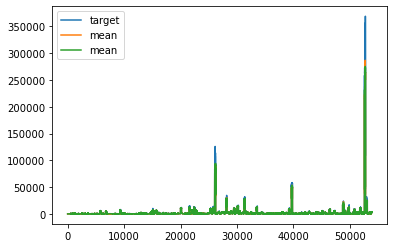

In [56]:
# plt.title('highest and lowest prediction and target of experiment A')
sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[36]['mean'].plot(legend=True)
sorted_forcast_list1[42]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

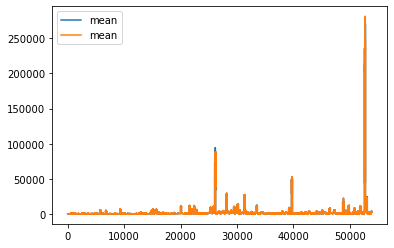

In [51]:
# plt.title('highest and lowest prediction and target of experiment A')
# sorted_forcast_list1[0]['target'].plot(legend=True)
sorted_forcast_list1[53]['mean'].plot(legend=True)
sorted_forcast_list1[59]['mean'].plot(legend=True)
# plt.xlim([10500,10650])
# plt.ylim([0.04,0.24])

## find the tuples for all the time series (it takes much time)

## take the average of experiment A and B and plot them
the reults show that after running 100 times, the average of results are converging.

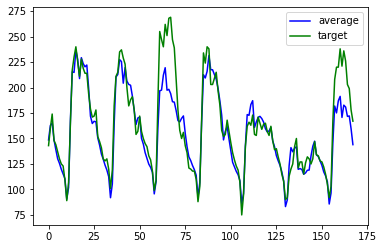

In [66]:
ts_no = 12

# calculate the mean of all means for computer A
ts_list1 = get_ts_list(sorted_forcast_list1, ts_no)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_no)


means_A = np.zeros((len(ts_list1) , ts_list1[0]['mean'].shape[0]))
# means_B = np.zeros((len(ts_list2) , ts_list2[0]['mean'].shape[0]))


for idx, ts_df1 in enumerate(ts_list1):
    means_A[idx] = ts_df1['mean'].to_numpy()
# for idx, ts_df2 in enumerate(ts_list2):
#     means_B[idx] = ts_df2['mean'].to_numpy()

mean_means_A = means_A.mean(axis=0)
# mean_means_B = means_B.mean(axis=0)

# plt.title(f'mean of experiment A and B on dataset {ts_no}')
plt.plot(mean_means_A, color='blue', label='average')
# plt.plot(mean_means_B, color='red')
plt.plot(ts_list1[0]['target'].to_numpy(), color='green', label='target')
plt.legend()
# mean1 = ts_list1[0]['mean'].to_numpy()
# mean1.shape

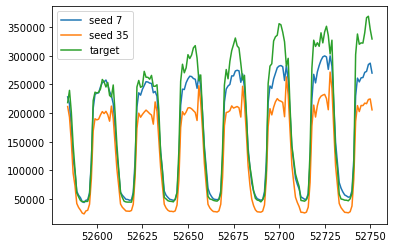

In [62]:
# plot high and low time series

# this dataframe is just one time series
ts_number = 313
ts_list1 = get_ts_list(sorted_forcast_list1, ts_number)
# ts_list2 = get_ts_list(sorted_forcast_list2, ts_number)
# plot mean of only one time series

rep_no = 7
# plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot(label='seed 7')
# ts_list2[rep_no]['mean'].plot()

rep_no = 35
# plt.title(f'comparing two mean of expriments with repetition #{rep_no}, time_series #{ts_number}')
ts_list1[rep_no]['mean'].plot(label='seed 35')
ts_list1[rep_no]['target'].plot(label='target')

# ts_list2[rep_no]['mean'].plot()

plt.legend()